<a href="https://colab.research.google.com/github/palubad/TAT2023/blob/main/Classical_vs_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of the classical and Automatic Machine Learning Approaches

**Author**: Daniel Paluba, Charles University, Prague, Czechia <br><br>


Developed specially for the Trans-Atlantic Training (TAT) 2023. <br>

---



**Contacts**: <br>
email: palubad@natur.cuni.cz <br>
LinkedIn: https://www.linkedin.com/in/daniel-paluba/







# Parts identical for the classical and Auto-ML approaches

## Install and import all necessary libraries

In [39]:
# Install auto-sklearn
!pip install -U auto-sklearn

# delete and install skicit-learn
# a workaround ... needed in Google Colab to use auto-sklearn
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

# install pipelineprofiler
!pip install pipelineprofiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 85.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 112.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 113.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 103.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 26.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 5.9 MB/s eta 0:00:00
  Created wheel for auto-skl

Found existing installation: scikit-learn 0.24.2
Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 69.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
auto-sklearn 0.15.0 requires scikit-learn<0.25.0,>=0.24.0, but you have scikit-learn 1.2.2 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.1/881.1 kB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.3 MB/s eta 0:00:00


In [40]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GroupShuffleSplit
# import PipelineProfiler
import pickle
%matplotlib inline

In [41]:
# Import auto-sklearn to test if it is working
import autosklearn
from autosklearn.regression import AutoSklearnRegressor
from autosklearn.pipeline.components.regression import RegressorChoice

# Print all available regressors
print('\nAvailable Regressors: ')
for name in RegressorChoice.get_components():
    print(name)


Available Regressors: 
adaboost
ard_regression
decision_tree
extra_trees
gaussian_process
gradient_boosting
k_nearest_neighbors
liblinear_svr
libsvm_svr
mlp
random_forest
sgd


<br>

---

<br>

### Select the target optical vegetation index

In [6]:
VI = 'NDVI'

#### Mount your Google Drive and change the base directory

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Change the working directory
%cd drive/MyDrive

/content/drive/MyDrive


### Import basic libraries

### Define helper functions to make our lives easier
... to avoid repetitions code blocks

In [35]:
# Define a function to predict the estimated optical vegetation indices and plot it with the original Sentinel-2 data
def predict_plot_S1_S2 (model):
  # Predict for deciduous forest area
  predicted_deciduous = model.predict(S1_deciduous[training_features])
  withPredictions_deciduous = S1_deciduous.copy()
  withPredictions_deciduous['predicted'] = predicted_deciduous

  # Predict for coniferous forest area
  predicted_coniferous = model.predict(S1_coniferous[training_features])
  withPredictions_coniferous = S1_coniferous.copy()
  withPredictions_coniferous['predicted'] = predicted_coniferous

  # Predict for area where a forest loss occurred
  predicted_loss1 = model.predict(loss_S1[training_features])
  withPredictions_loss1 = loss_S1.copy()
  withPredictions_loss1['predicted'] = predicted_loss1

  # Predict for area where a forest loss occurred (2)
  predicted_loss2 = model.predict(loss2_S1[training_features])
  withPredictions_loss2 = loss2_S1.copy()
  withPredictions_loss2['predicted'] = predicted_loss2

  # Set the marker size for data points
  marker_size = 3

  # Set the linewidth for the time series
  line_width = 0.6

  # Create a 2x2 subplot grid
  fig, axs = plt.subplots(2, 2,figsize=(12, 8))

  # Plot for deciduous forest area
  axs[0, 0].plot(withPredictions_deciduous["DOY"], withPredictions_deciduous["predicted"], 'o-', markersize=marker_size, linewidth=line_width, color='blue', label='Predicted '+VI)
  axs[0, 0].plot(S2_deciduous["DOY"], S2_deciduous[VI], 'o-', markersize=marker_size, linewidth=line_width, color='red', label='Original  '+VI)
  axs[0, 0].set_xlabel("Day of the year (DOY)")
  axs[0, 0].set_ylabel("Original / predicted "+VI)
  axs[0, 0].set_title('Original vs predicted ' + VI + ' (deciduous forests)')
  axs[0, 0].legend()
  axs[0, 0].set_xlim([0, 365])

  # Plot for coniferous forest area
  axs[0, 1].plot(withPredictions_coniferous["DOY"], withPredictions_coniferous["predicted"], 'o-', markersize=marker_size, linewidth=line_width, color='blue', label='Predicted '+VI)
  axs[0, 1].plot(S2_coniferous["DOY"], S2_coniferous[VI], 'o-', markersize=marker_size, linewidth=line_width, color='red', label='Original  '+VI)
  axs[0, 1].set_xlabel("Day of the year (DOY)")
  axs[0, 1].set_ylabel("Original / predicted "+VI)
  axs[0, 1].set_title('Original vs predicted ' + VI + ' (coniferous forests)')
  axs[0, 1].legend()
  axs[0, 1].set_xlim([0, 365])

  # Plot for forest loss (1)
  axs[1, 0].plot(withPredictions_loss1["DOY"], withPredictions_loss1["predicted"], 'o-', markersize=marker_size, linewidth=line_width, color='blue', label='Predicted '+VI)
  axs[1, 0].plot(loss_S2["DOY"], loss_S2[VI], 'o-', markersize=marker_size, linewidth=line_width, color='red', label='Original  '+VI)
  axs[1, 0].set_xlabel("Day of the year (DOY)")
  axs[1, 0].set_ylabel("Original / predicted "+VI)
  axs[1, 0].set_title('Original vs predicted ' + VI + ' for a forest loss (coniferous forests)')
  axs[1, 0].legend()
  axs[1, 0].set_xlim([0, 365])

  # Plot for forest loss (2)
  axs[1, 1].plot(withPredictions_loss2["DOY"], withPredictions_loss2["predicted"], 'o-', markersize=marker_size, linewidth=line_width, color='blue', label='Predicted '+VI)
  axs[1, 1].plot(loss2_S2["DOY"], loss2_S2[VI], 'o-', markersize=marker_size, linewidth=line_width, color='red', label='Original  '+VI)
  axs[1, 1].set_xlabel("Day of the year (DOY)")
  axs[1, 1].set_ylabel("Original / predicted "+VI)
  axs[1, 1].set_title('Original vs predicted ' + VI + ' for a forest loss (coniferous forests)')
  axs[1, 1].legend()
  axs[1, 1].set_xlim([0, 365])

  # Adjust the spacing between subplots
  fig.tight_layout()

  # Display the plots
  plt.show()

In [10]:
# A helper function to make our lives easier
# A function to print the accuracy of our models both on training and test sets
def evaluation (train_predictions, test_predictions):
    print("Train mean_squared_error score:", sklearn.metrics.mean_squared_error(y_train, train_predictions))
    print("Test mean_squared_error score:", sklearn.metrics.mean_squared_error(y_test, test_predictions))
    print("Train mean_absolute_error score:", sklearn.metrics.mean_absolute_error(y_train, train_predictions))
    print("Test mean_absolute_error score:", sklearn.metrics.mean_absolute_error(y_test, test_predictions))
    print("Test max_error score:", sklearn.metrics.max_error(y_test, test_predictions))

In [11]:
# A helper function to pre-process the manually updated data from the GEE SAR_OPtical_TSExplorer application
def preprocess_manual_entry_from_GEE (loaded_csv, centroid_x, centroid_y):

    # Create sin_doy and cos_doy
    # Function to ddd date as sin and cos of DOY
    def dayOfYear(date):
        days = [0,31,28,31,30,31,30,31,31,30,31,30,31]
        d = list(map(int,date.split("-")))
        if d[0] % 400 == 0:
            days[2]+=1
        elif d[0]%4 == 0 and d[0]%100!=0:
            days[2]+=1
        for i in range(1,len(days)):
            days[i]+=days[i-1]
        return days[d[1]-1]+d[2]
    # Add X,Y coordinates

    # Add DOY as circular features - as cos and sin
    loaded_csv = loaded_csv.assign(year=pd.to_numeric(loaded_csv['date'].str[0:4])).assign(month=pd.to_numeric(loaded_csv['date'].str[4:6])).assign(day=pd.to_numeric(loaded_csv['date'].str[6:8])).assign(hour=pd.to_numeric(loaded_csv['date'].str[9:11]))
    loaded_csv['date_formatted'] = loaded_csv['date'].str[0:4] + '-' + loaded_csv['date'].str[4:6] + '-' + loaded_csv['date'].str[6:8]
    loaded_csv['DOY'] = loaded_csv['date_formatted'].apply(dayOfYear)

    loaded_csv['doy_sin'] = np.sin(2 * np.pi * loaded_csv['DOY']/365)
    loaded_csv['doy_cos'] = np.cos(2 * np.pi * loaded_csv['DOY']/365)

    loaded_csv['centroid_x'] = centroid_x
    loaded_csv['centroid_y'] = centroid_y

    return loaded_csv

### Data import and exploration

In [12]:
# Data import
healthy_data = pd.read_csv('AutoML/TAT_healthy_dec_conif_cropped.csv', delimiter=',')
disturbed_data = pd.read_csv('AutoML/TAT_disturbed_dec_conif_cropped.csv', delimiter=',')

# Data eploration
print('Number of healthy deciduous forest areas:', len(healthy_data.loc[healthy_data['forest_type']==1]['ID'].unique()))
print('Number of healthy coniferous forest areas:', len(healthy_data.loc[healthy_data['forest_type']==2]['ID'].unique()))
print('Number of disturbed deciduous forest areas:', len(disturbed_data.loc[disturbed_data['forest_type']==3]['ID'].unique()))
print('Number of disturbed coniferous forest areas:', len(disturbed_data.loc[disturbed_data['forest_type']==4]['ID'].unique()))

# Merge healthy and disturbed forest areas into one dataset
data = pd.concat([healthy_data,disturbed_data])

# Show the data
data

Number of healthy deciduous forest areas: 412
Number of healthy coniferous forest areas: 360
Number of disturbed deciduous forest areas: 383
Number of disturbed coniferous forest areas: 329


EVI      NDVI      NDMI      NDWI         VV         VH       RVI  \
0      0.368226  0.726658  0.615177 -0.768854  -9.689403 -13.799517  0.185279   
1      0.368226  0.726658  0.615177 -0.768854 -10.939664 -15.136759  0.161837   
2      0.051619  0.043598  0.830150  0.020057 -10.294232 -14.821171  0.082178   
3      0.088011  0.071302  0.866843 -0.022768  -5.803965 -13.753560 -2.631615   
4      0.166894  0.448884 -0.125263 -0.578721  -9.321164 -13.800305  0.181498   
...         ...       ...       ...       ...        ...        ...       ...   
13287 -0.520769 -0.054121  0.511324  0.270505 -12.047976 -18.418572 -1.329841   
13288 -0.030565 -0.033220  0.694738  0.219294 -11.866846 -13.583605  1.945127   
13289 -0.970705  0.060245  0.720936  0.175334 -11.138990 -19.849635 -3.282626   
13290  0.350391  0.777778  0.567853 -0.857203 -11.058815 -16.190529 -0.374292   
13291 -0.011076 -0.551724  0.238095  0.885463 -12.944560 -21.091032 -2.874963   

          VH/VV  DOY   doy_cos   doy_sin  centroid_x  centroid_y  forest_type  \
0     -4.110114   31  0.860961  0.508671   13.205574   50.218028            1   
1     -4.197095   32  0.852078  0.523416   13.205574   50.218028            1   
2     -4.526938   43  0.738326  0.674444   13.104495   50.250049            1   
3     -7.949594   43  0.738326  0.674444   13.237796   50.198058            1   
4     -4.479141   56  0.570242  0.821477   13.081058   50.237991            1   
...         ...  ...       ...       ...         ...         ...          ...   
13287 -6.370596  359  0.994671 -0.103102   14.498298   50.830189            4   
13288 -1.716759  359  0.994671 -0.103102   14.257424   50.608476            4   
13289 -8.710645  359  0.994671 -0.103102   14.423162   50.869233            4   
13290 -5.131715  359  0.994671 -0.103102   14.678065   50.483643            4   
13291 -8.146472  359  0.994671 -0.103102   14.403136   50.891401            4   

          ID  
0       6183  
1       6183  
2      12964  
3      22495  
4       9539  
...      ...  
13287  90494  
13288  90298  
13289  90432  
13290  90557  
13291  90404  

[26554 rows x 15 columns]

### Import sample data for time series exploration of healthy and disturbed forest areas (for later)

In [13]:
# Load the sample Sentinel-2 time series data for deciduous forest areas
S2_deciduous = pd.read_csv('AutoML/samples/S2_sample_deciduous.csv')
# Load the sample Sentinel-1 time series data for deciduous forest areas
S1_deciduous = pd.read_csv('AutoML/samples/S1_sample_deciduous.csv')

# Load the sample Sentinel-2 time series data for coniferous forest areas
S2_coniferous = pd.read_csv('AutoML/samples/S2_sample_coniferous.csv')
# Load the sample Sentinel-1 time series data for coniferous forest areas
S1_coniferous = pd.read_csv('AutoML/samples/S1_sample_coniferous.csv')

# Load two forest loss samples for a Sentinel-1 and Sentinel-2 time series
loss_S1 = pd.read_csv('AutoML/samples/loss_S1.csv')
loss_S2 = pd.read_csv('AutoML/samples/loss_S2.csv')
loss2_S1 = pd.read_csv('AutoML/samples/loss2_S1.csv')
loss2_S2 = pd.read_csv('AutoML/samples/loss2_S2.csv')

### A quick pre-processing

In [14]:
# Check for NaN values in both otpical and SAR features
data = data.dropna(subset=[VI, 'VH','VV'])

# Change number data types from Float64 to Float16 to save memory
## Float64 is too large data type for some of the ML algorithms in scikit-learn, e.g. for the Random Forest algorithm
list_of_float64 = list(data.select_dtypes(include='float64'))
data[list_of_float64] = data[list_of_float64].astype('float16')
data[['DOY','ID']] = data[['DOY','ID']].astype('int32')
data['forest_type'] = data['forest_type'].astype('int8')

# Show the data types
print('Data types of the features:')
data.dtypes

Data types of the features:


EVI            float16
NDVI           float16
NDMI           float16
NDWI           float16
VV             float16
VH             float16
RVI            float16
VH/VV          float16
DOY              int32
doy_cos        float16
doy_sin        float16
centroid_x     float16
centroid_y     float16
forest_type       int8
ID               int32
dtype: object

In [15]:
# Select features which will be used for training our model(s)
training_features = [
    'VV', 'VH',
    'RVI', 'VH/VV',
    'forest_type',
    'doy_cos', 'doy_sin',
    'centroid_x', 'centroid_y'
]

### Test and training data preparation

In [16]:
#separate the other attributes from the predicting attribute
X = data.drop([VI],axis=1)

#separte the predicting attribute into Y for model training
y = data[[VI]]

# Split by ID - by points... one point only in test or train
ID_len = len((data.loc[:,'ID']).unique())

gs = GroupShuffleSplit(n_splits=ID_len, train_size=.7, random_state=42)
train_ix, test_ix = next(gs.split(X, y, groups=X.ID))

X_train = X.iloc[train_ix]
y_train = y.iloc[train_ix]
X_train_IDs = X_train.ID
X_train = X_train[training_features]

X_test = X.iloc[test_ix]
X_test_IDs = X_test.ID
y_test = y.iloc[test_ix]
X_test = X_test[training_features]

# Change the 'forest_type' feature to 1 and 2 for disturbed deciduous and coniferous forest areas, respectively
X_train.loc[X_train["forest_type"] == 3, "forest_type"] = 1
X_train.loc[X_train["forest_type"] == 4, "forest_type"] = 2
X_test.loc[X_test["forest_type"] == 3, "forest_type"] = 1
X_test.loc[X_test["forest_type"] == 4, "forest_type"] = 2

In [17]:
# Check if there are duplicate IDs in the training and testing - test the data leakage between training and testing sets
xtestIDs = X_train_IDs.unique()
xtrainIDs = X_test_IDs.unique()
joined = np.concatenate((xtestIDs,xtrainIDs))

print('X_test length:', len(xtestIDs), '\nX_train length:', len(xtrainIDs), '\nTheir sum length:', len(xtrainIDs)+len(xtestIDs))
print('Joined length: ', len(np.unique(joined)))

X_test length: 1038 
X_train length: 446 
Their sum length: 1484
Joined length:  1484


In [18]:
# Explore the train and test data
X_train
# X_test

VV         VH       RVI     VH/VV  forest_type   doy_cos  \
0      -9.687500 -13.796875  0.185303 -4.109375            1  0.860840   
1     -10.937500 -15.140625  0.161865 -4.195312            1  0.852051   
2     -10.296875 -14.820312  0.082153 -4.527344            1  0.738281   
3      -5.804688 -13.750000 -2.630859 -7.949219            1  0.738281   
4      -9.320312 -13.796875  0.181519 -4.480469            1  0.570312   
...          ...        ...       ...       ...          ...       ...   
13287 -12.046875 -18.421875 -1.330078 -6.371094            2  0.994629   
13288 -11.867188 -13.585938  1.945312 -1.716797            2  0.994629   
13289 -11.140625 -19.843750 -3.283203 -8.710938            2  0.994629   
13290 -11.062500 -16.187500 -0.374268 -5.132812            2  0.994629   
13291 -12.945312 -21.093750 -2.875000 -8.148438            2  0.994629   

        doy_sin  centroid_x  centroid_y  
0      0.508789   13.203125    50.21875  
1      0.523438   13.203125    50.21875  
2      0.674316   13.101562    50.25000  
3      0.674316   13.234375    50.18750  
4      0.821289   13.078125    50.25000  
...         ...         ...         ...  
13287 -0.103088   14.500000    50.84375  
13288 -0.103088   14.257812    50.59375  
13289 -0.103088   14.421875    50.87500  
13290 -0.103088   14.679688    50.46875  
13291 -0.103088   14.406250    50.90625  

[18528 rows x 9 columns]

# The classical Machine Learning approach - one algorithm

In [19]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regression model with default hyperparameters
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train.values.ravel()) # adding ".values.ravel()" to avoid errors due to data input formats :-)

RandomForestRegressor()

### Prediction & validation

In [20]:
# Predict on both the test and train sets
test_predictions = rf_model.predict(X_test)
train_predictions = rf_model.predict(X_train)

# Print the validation values using the helper function
evaluation(train_predictions, test_predictions)

Train mean_squared_error score: 0.0008067426416278659
Test mean_squared_error score: 0.010002796453014686
Train mean_absolute_error score: 0.019278148880070765
Test mean_absolute_error score: 0.0685007086591533
Test max_error score: 0.8763427734375


### Show the time series on unseen data

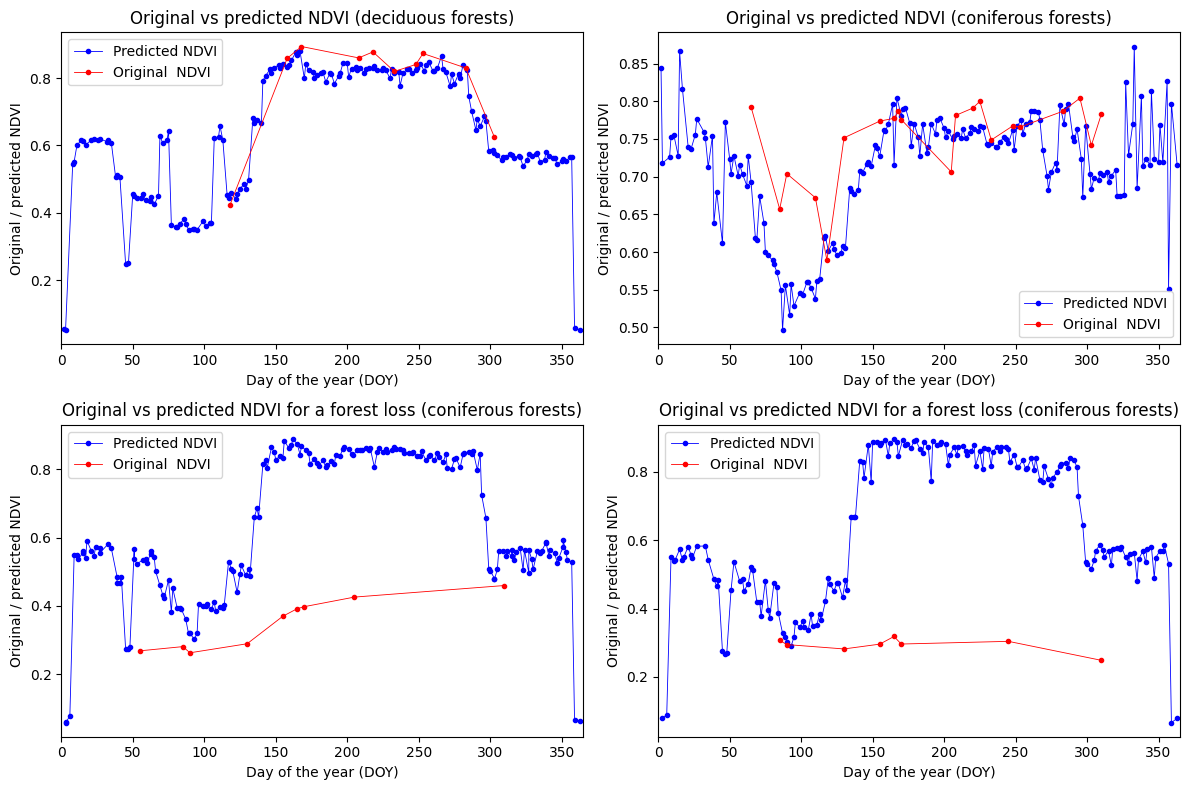

In [36]:
# Run the helper function to predict the estimated VI and plot S1-S2 time series
predict_plot_S1_S2(rf_model)

## Do the same with model hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 75],  # Number of trees
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

# Create a Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel()) # adding ".values.ravel()" to avoid errors due to data input formats :-)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 75]},
             scoring='neg_mean_squared_error')

In [ ]:
# Show the best estimator
print('Best parameters:',grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 75}


### Prediction & validation

In [ ]:
# Predict on both the test and train sets
sel_model_GS = grid_search.best_estimator_

# Fit the estimator
sel_model_GS.fit(X_train, y_train.values.ravel())

# Predict
test_predictions_GS = sel_model_GS.predict(X_test)
train_predictions_GS = sel_model_GS.predict(X_train)

# Print the validation values using the helper function
evaluation(train_predictions_GS, test_predictions_GS)

Train mean_squared_error score: 0.0008261417722875785
Test mean_squared_error score: 0.0100541891391345
Train mean_absolute_error score: 0.01931388480538394
Test mean_absolute_error score: 0.06865472115019904
Test max_error score: 0.8935270182291667


### Show the time series on unseen data

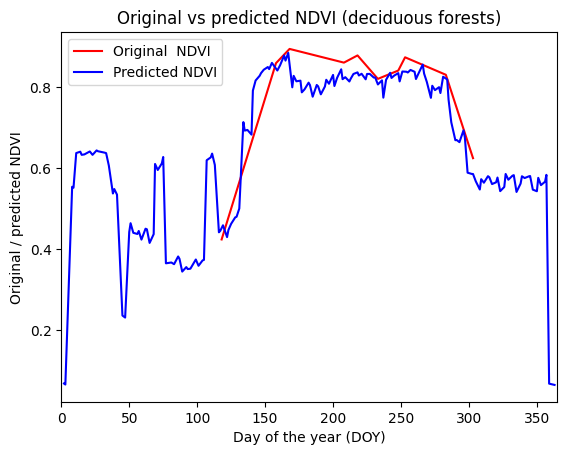

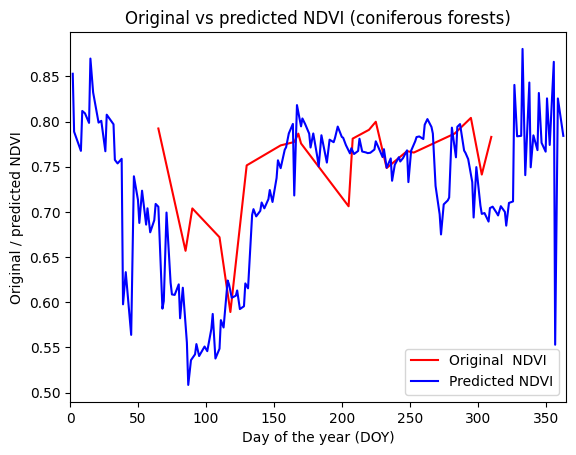

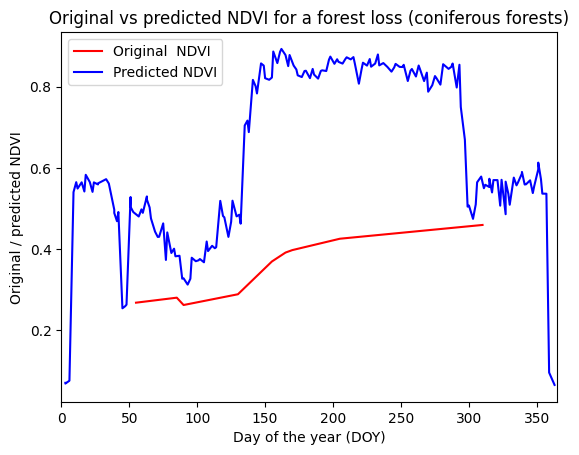

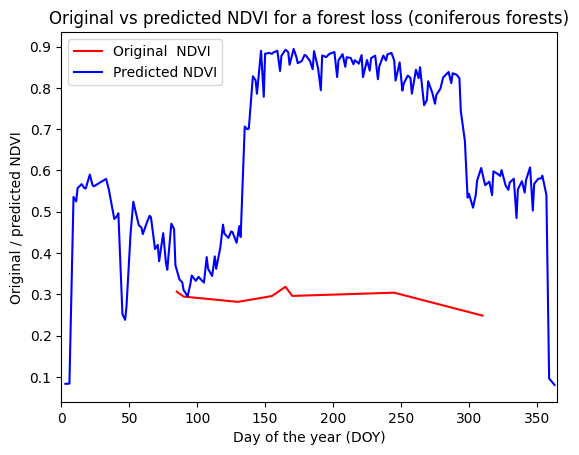

In [ ]:
# Run the helper function to predict the estimated VI and plot S1-S2 time series
predict_plot_S1_S2(sel_model_GS)

<br>

---
<br>


# AutoML part - Auto-sklearn

In [ ]:
# Initialize Auto-Sklearn
automl = AutoSklearnRegressor(
    time_left_for_this_task=3*60,
    # per_run_time_limit=1*60*60,
    # tmp_folder="/tmp/autosklearn_regression_example_tmp8",
    metric=autosklearn.metrics.mean_absolute_error,
    n_jobs=-1,
    resampling_strategy="cv",
    resampling_strategy_arguments={"folds": 10,"groups": X_train_IDs}
)

In [ ]:
# Fit the model --> this step starts the search
automl.fit(X_train, y_train, dataset_name="S2_from_SAR")

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37509 instead
  warnings.warn(


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     metric=mean_absolute_error, n_jobs=-1,
                     per_run_time_limit=36, resampling_strategy='cv',
                     resampling_strategy_arguments={'folds': 10,
                                                    'groups': 0         6183
1         6183
2        12964
3        22495
4         9539
         ...  
13287    90494
13288    90298
13289    90432
13290    90557
13291    90404
Name: ID, Length: 18528, dtype: int32},
                     time_left_for_this_task=180)

In [ ]:
# Print the overall statistics of the analysis
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: S2_from_SAR
  Metric: mean_absolute_error
  Best validation score: 0.095780
  Number of target algorithm runs: 26
  Number of successful target algorithm runs: 1
  Number of crashed target algorithm runs: 16
  Number of target algorithms that exceeded the time limit: 7
  Number of target algorithms that exceeded the memory limit: 2



In [ ]:
# Print the final ensemble
print(automl.leaderboard())

          rank  ensemble_weight                 type     cost   duration
model_id                                                                
7            1              1.0  k_nearest_neighbors  0.09578  10.708808


In [ ]:
# Visualise all the tested pipelines (combinations of data and feature preprocessors, algorithm selection and its hyperparameters)
profiler_data= PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

### Prediction & validation

In [ ]:
# Predict on both the test and train sets
test_predictions_autoML = automl.predict(X_test)
train_predictions_autoML = automl.predict(X_train)

# Print the validation values using the helper function
evaluation(train_predictions_autoML, test_predictions_autoML)

Train mean_squared_error score: 0.0005942684542163718
Test mean_squared_error score: 0.016934218027621354
Train mean_absolute_error score: 0.01261943048336712
Test mean_absolute_error score: 0.09380785311037781
Test max_error score: 1.0951674729585648


# Time series tests on unseen data

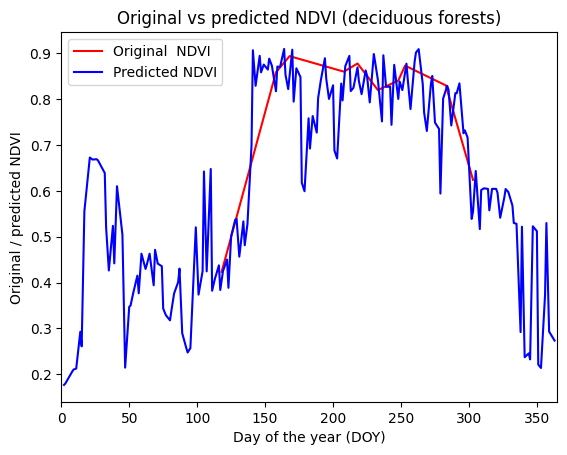

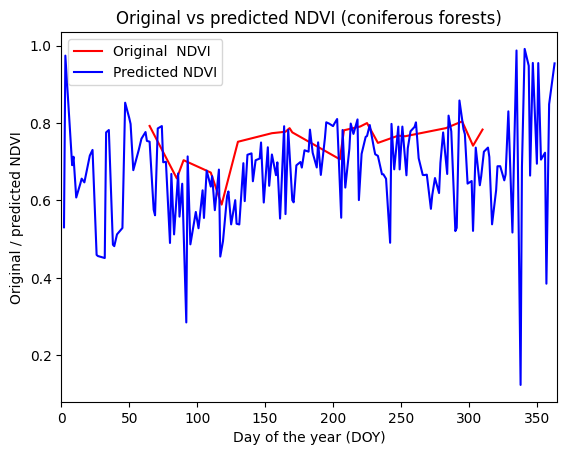

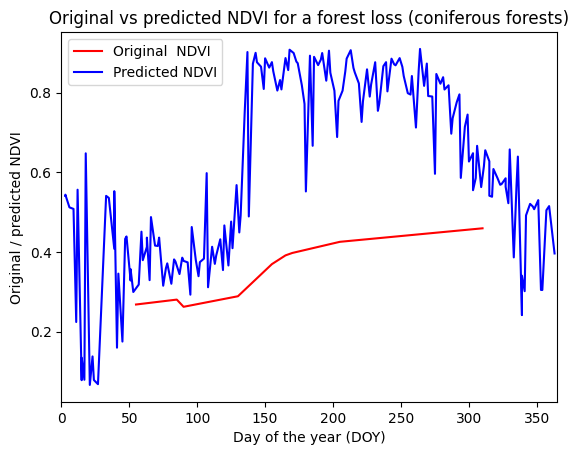

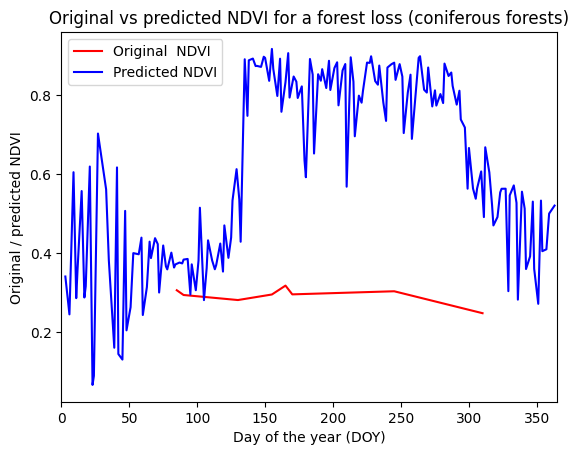

In [ ]:
# Run the helper function to predict the estimated VI and plot S1-S2 time series
predict_plot_S1_S2(automl)

## Save the model, load it and test it

In [ ]:
# create a new folder in your Google drive to save your model
!mkdir resulting_models

mkdir: cannot create directory ‘resulting_models’: File exists


In [ ]:
# Save the model
fileName = 'My_First_AutML_Model'

pickle.dump(automl, open('resulting_models/'+ fileName + '.pickle', 'wb'))

In [ ]:
# load the saved model and predict
loaded_model = pickle.load(open('resulting_models/'+ fileName + '.pickle','rb'))
test_predictions_from_loaded = loaded_model.predict(X_test)
train_predictions_from_loaded = loaded_model.predict(X_train)

# check the loaded model / overall statistics for the entire model using the helper function
evaluation(train_predictions_autoML, test_predictions_autoML)

Train mean_squared_error score: 0.0005942684542163718
Test mean_squared_error score: 0.016934218027621354
Train mean_absolute_error score: 0.01261943048336712
Test mean_absolute_error score: 0.09380785311037781
Test max_error score: 1.0951674729585648
